In [1]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


# 画素値のアクセスと変更方法

まず初めにカラー画像を読み込もう:

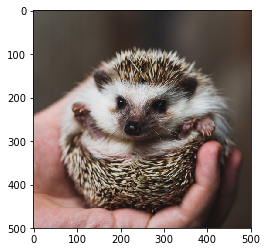

In [5]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！
plt.plot(), plt.imshow(img)
plt.show()

ある画素の行と列の座標を指定することで画素値にアクセスできる．BGR画像の画素値は青，緑，赤の色成分の値の配列，グレースケール画像の画素値は明るさを返す．



In [6]:
px = img[100,100]
print (px)

[74 67 57]


In [7]:
# accessing only blue pixel
blue = img[100,100,0]
print (blue)

74


同様のアクセス方法を使えば，画素値の変更ができる．

In [8]:
img[100,100] = [255,255,255]
print (img[100,100])

[255 255 255]


Warning Numpyは配列計算を高速におこなうために最適化されたライブラリである．そのため，画素値の取得や変更を各画素に対して行う処理は処理時間がかかってしまうので推奨されない．

Note 上述した方法は配列の領域(例えば最初の5列と最後の3行)を選択する時によく使われる．各画素へのアクセスに関してはNumpyの配列を扱う array.item() と array.itemset() を使うと良い．しかし，これらの関数は常にスカラー値を返すため，青，緑，赤の全画素値にアクセスするには array.item() を全ての色成分に対して行う必要がある．

よりよい画素へのアクセス方法と変更方法 :

In [10]:
# accessing RED value
img.item(10,10,2)

100

In [11]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

# 画像の属性情報の取得

画像の属性情報とは，列の数，行の数，チャンネル数(色相数)，画像データの型，画素数などを意味する．

画像の形状は img.shape によって取得できる．返戻値は 行数，列数，チャンネル数(カラー画像であれば)のtupleである:

In [12]:
print (img.shape)

(500, 500, 3)


Note グレースケール画像であれば返戻値のtupleは行数と列数しか含まない． そのため，この方法は画像がグレースケールかカラーか調べる良い方法と言える．

合計画素数は img.size で調べられる :


In [13]:
print(img.size)

750000


画像データのデータ型は img.dtype によって得られる:

In [14]:
print(img.dtype)

uint8


Note img.dtype はデバッグの際に非常に重要になる．なぜならOpenCV-Pythonで実装していく上で生じる多くのエラーが不正なデータ型によって発生するからである．

# 画像中の注目領域(ROI)

画像の特定の領域に対して何らかの処理をする必要が生じることがある．画像中から目を検出するなら，まずは画像全体に対して顔検出を行い，次に検出した顔の内部で目の検出をするだろう．この方法は精度の向上をすると共に，(目の検出は画像中の一部の領域のみに適用すればよくなるため)パフォーマンスの向上にもつながる．

注目領域(ROI)の指定にはNumpyのインデックスを使う．ここでは，画像中のボールの位置を選択し別の場所にコピーする:



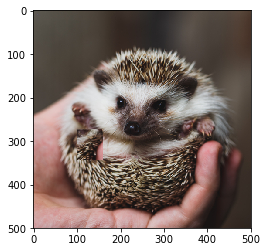

In [20]:
ball = img[280:350, 330:390]
img[273:343, 100:160] = ball

plt.plot(), plt.imshow(img)
plt.show()

# 画像の色成分の分割と統合

画像の青，緑，赤成分は必要であれば独立した色成分へと分割できる．独立した色成分を統合してBGR画像をもう一度作ることも可能である:

In [21]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

もしくは以下のように，ある色成分だけ抽出することができる：

In [ ]:
b = img[:,:,0]

画像中の赤の色成分だけ全て0に設定したいが，その他の色成分と分割はしたくないと仮定する．Numpyのインデックスを使えばより速く実現できる．

In [22]:
img[:,:,2] = 0

Warning cv2.split() は(処理速度の観点で)計算コストの大きい処理になるため，必要な時のみ実行するようにしよう．Numpyのインデックスは効率がよいので，可能ならこれを使うようにしよう．


# 画像の境界領域を作る(パディング)

画像にフォトフレームのような境界線を引くには cv2.copyMakeBorder() 関数を使う．しかし，画像のconvolutionやゼロパディングといった処理もある．この関数の引数を以下に示す:

src - 入力画像

top, bottom, left, right - 境界の各方向に対する線幅

borderType - 追加する境界の種類を指定するためのフラグ．以下のタイプがある:
cv2.BORDER_CONSTANT - 単一色の境界を追加する．次の引数で色の指定をする．
cv2.BORDER_REFLECT - 鏡に写したかのように境界を追加する．例えば，以下のような境界が得られる: fedcba|abcdefgh|hgfedcb
cv2.BORDER_REFLECT_101 か cv2.BORDER_DEFAULT - cv2.BORDER_REFLECT と同じだが，微妙に違う : gfedcb|abcdefgh|gfedcba
cv2.BORDER_REPLICATE - 最後の要素が繰り返し現れる: aaaaaa|abcdefgh|hhhhhhh
cv2.BORDER_WRAP - 説明がうまくできないが，こんな風になる : cdefgh|abcdefgh|abcdefg
value - フラグが cv2.BORDER_CONSTANT の時に指定する境界の色



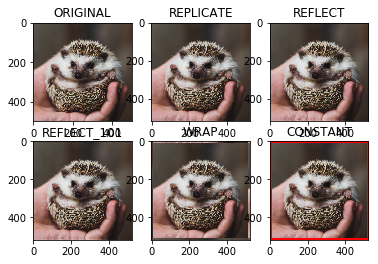

In [23]:

BLUE = [255,0,0]

img = cv2.imread('../../img/hari.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()